In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
x, y = make_classification(n_samples=1000, n_classes=2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

**K-Fold CV**

In [5]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')

print(f"CV Scores: {scores}")
print(f"Mean: {scores.mean():.3f} (+/- {scores.std():.3f})")

CV Scores: [0.895 0.86  0.935 0.88  0.925]
Mean: 0.899 (+/- 0.028)


In [6]:
# Calculate confidence interval (95%)
mean_score = scores.mean()
std_score = scores.std()
n_splits = len(scores)

confidence_interval = 1.96 * std_score / np.sqrt(n_splits)
print(f"95% Confidence Interval: [{mean_score - confidence_interval:.3f}, "
      f"{mean_score + confidence_interval:.3f}]")

95% Confidence Interval: [0.875, 0.923]


- Visualization

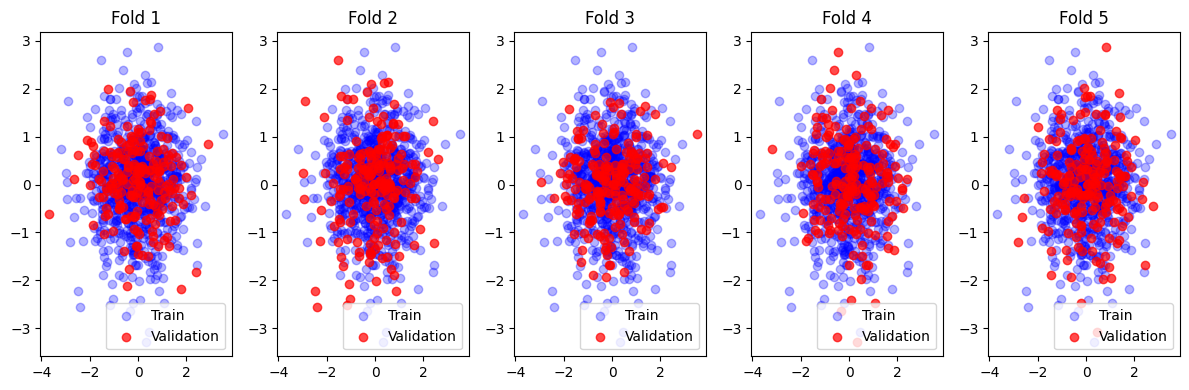

In [8]:
fig, axes = plt.subplots(1, 5, figsize=(12, 4))

for fold, (train_idx, val_idx) in enumerate(kfold.split(x)):
    axes[fold].scatter(x[train_idx, 0], x[train_idx, 1], 
                      c='blue', alpha=0.3, label='Train')
    axes[fold].scatter(x[val_idx, 0], x[val_idx, 1], 
                      c='red', alpha=0.7, label='Validation')
    axes[fold].set_title(f'Fold {fold+1}')
    axes[fold].legend()

plt.tight_layout()
plt.show()

**Stratified K-Fold**

In [ ]:
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, x, y, cv=skfold, scoring='accuracy')

print(f"Stratified CV Scores: {scores}")
print(f"Mean: {scores.mean():.3f} (+/- {scores.std():.3f})")

Stratified CV Scores: [0.87  0.92  0.9   0.875 0.88 ]
Mean: 0.889 (+/- 0.019)


**Leave-One-Out Cross-Validation**

In [ ]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut() # (slow for large datasets!)
scores = cross_val_score(model, x[:100], y[:100], cv=loo, scoring='accuracy')

print(f"LOO CV Mean: {scores.mean():.3f}")

LOO CV Mean: 0.840


**Time Series Cross-Validation**

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(x):
    print(f"Train: {train_idx[0]} to {train_idx[-1]}, "
          f"Test: {test_idx[0]} to {test_idx[-1]}")

Train: 0 to 169, Test: 170 to 335
Train: 0 to 335, Test: 336 to 501
Train: 0 to 501, Test: 502 to 667
Train: 0 to 667, Test: 668 to 833
Train: 0 to 833, Test: 834 to 999
